In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("loan_data.csv")

In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

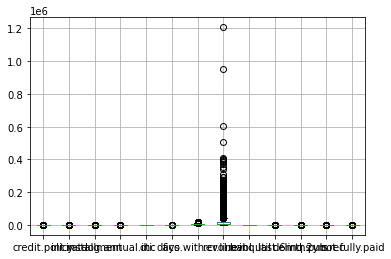

In [7]:
df.boxplot(figsize=(12,5))

<AxesSubplot:>

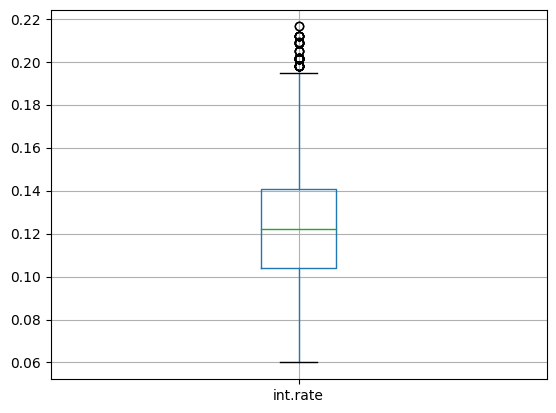

In [8]:
df[["int.rate"]].boxplot()

<AxesSubplot:>

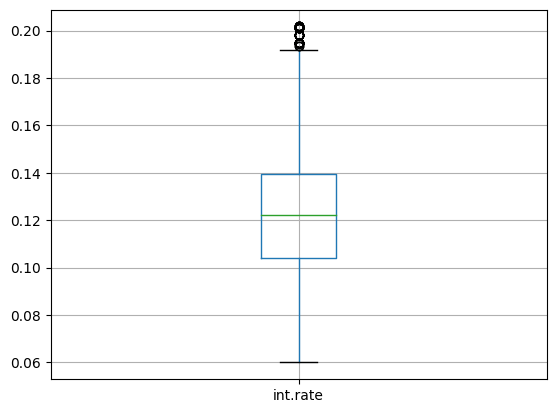

In [9]:
from scipy.stats import zscore
z_score_value=np.abs(zscore(df["int.rate"]))
z_score_value
array1=np.where(z_score_value>3)
array1
array=df["int.rate"].to_numpy()
# array[array1]
array[array1]=df["int.rate"].median()
df[["int.rate"]].boxplot()

In [10]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:>

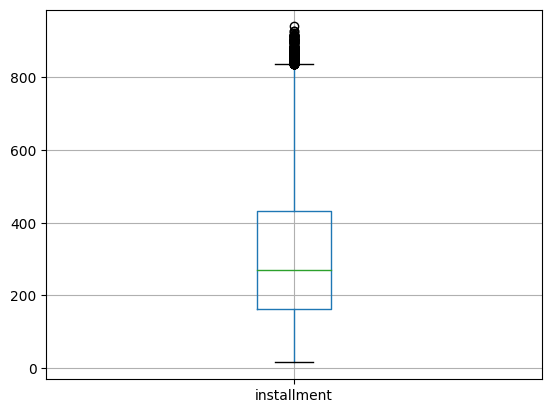

In [11]:
df[["installment"]].boxplot()

<AxesSubplot:>

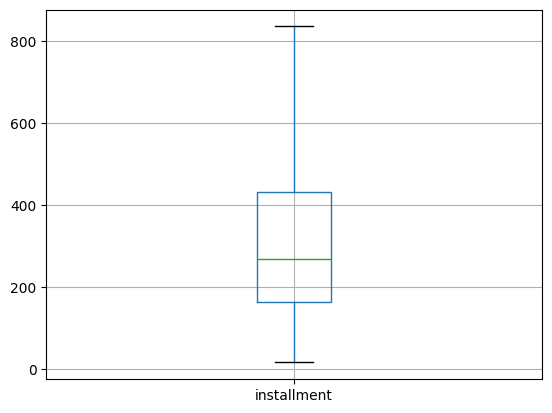

In [12]:
q1=df["installment"].quantile(0.25)
q3=df["installment"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["installment"]].loc[df["installment"]>upper_limit]
df.loc[df["installment"]>upper_limit,"installment"]=upper_limit
df[["installment"]].boxplot()

In [13]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [14]:
# df[["revol.bal"]].boxplot()

In [15]:
q1=df["revol.bal"].quantile(0.25)
q3=df["revol.bal"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["revol.bal"]].loc[df["revol.bal"]>upper_limit]
df.loc[df["revol.bal"]>upper_limit,"revol.bal"]=np.nan
# # df[["installment"]].boxplot()
df.isna().sum()

credit.policy          0
purpose                0
int.rate               0
installment            0
log.annual.inc         0
dti                    0
fico                   0
days.with.cr.line      0
revol.bal            780
revol.util             0
inq.last.6mths         0
delinq.2yrs            0
pub.rec                0
not.fully.paid         0
dtype: int64

In [16]:
k=pd.DataFrame()
k=df


In [17]:
df1=df.drop("purpose",axis=1)

#### use knn imputer 

<AxesSubplot:>

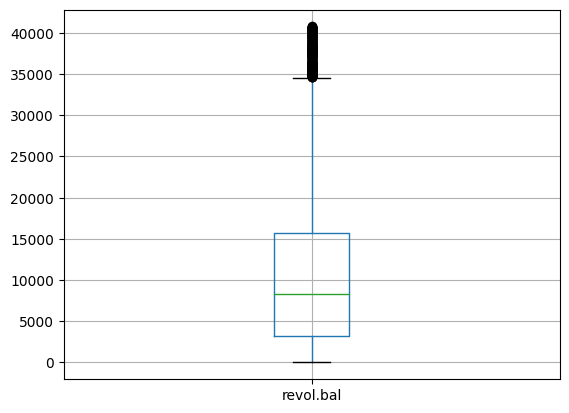

In [18]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()
array=knn_imputer.fit_transform(df1)
df=pd.DataFrame(array,columns=df1.columns)
df["purpose"]=k["purpose"]
df[["revol.bal"]].boxplot()

### encoding

In [19]:
df=pd.get_dummies(df,columns=["purpose"])
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.1189,829.10000,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1.0,0.1071,228.22000,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1.0,0.1357,366.86000,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0
3,1.0,0.1008,162.34000,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0
4,1.0,0.1426,102.92000,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.1461,344.76000,12.180755,10.39,672.0,10474.000000,16662.0,82.1,2.0,0.0,0.0,1.0,1,0,0,0,0,0,0
9574,0.0,0.1253,257.70000,11.141862,0.21,722.0,4380.000000,184.0,1.1,5.0,0.0,0.0,1.0,1,0,0,0,0,0,0
9575,0.0,0.1071,97.81000,10.596635,13.09,687.0,3450.041667,10036.0,82.9,8.0,0.0,0.0,1.0,0,0,1,0,0,0,0
9576,0.0,0.1600,351.58000,10.819778,19.18,692.0,1800.000000,0.0,3.2,5.0,0.0,0.0,1.0,0,0,0,0,1,0,0


In [20]:
x=df.drop("credit.policy",axis=1)
y=df["credit.policy"]

### check no multicolinearity

<AxesSubplot:>

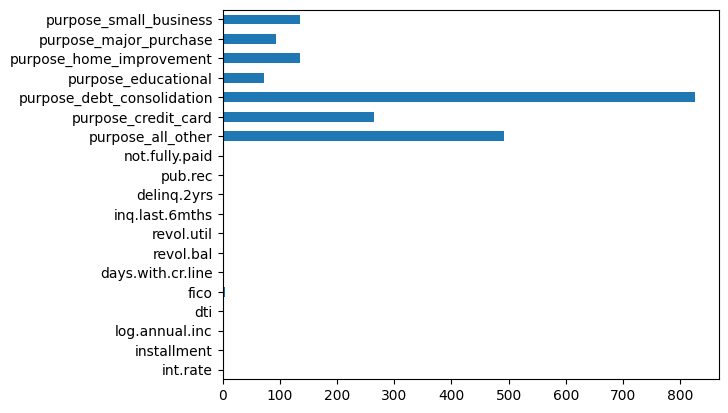

In [21]:

lst=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    lst.append(vif)
lst
s1=pd.Series(lst,index=x.columns)
s1.plot(kind="barh")

### train_test split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)

In [23]:
logistic_model=LogisticRegression()

In [24]:
logistic_model.fit(x_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### model evaluation for testing

In [25]:
y_pred_test=logistic_model.predict(x_test)
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test is\n",confusion_matrix_test)

accuracy_test=accuracy_score(y_test,y_pred_test)
print("accuracy of testing is \n",accuracy_test)

classification_report_test=classification_report(y_test,y_pred_test)
print("classification report is\n",classification_report_test)


confusion matrix for test is
 [[ 205  169]
 [  32 1510]]
accuracy of testing is 
 0.8950939457202505
classification report is
               precision    recall  f1-score   support

         0.0       0.86      0.55      0.67       374
         1.0       0.90      0.98      0.94      1542

    accuracy                           0.90      1916
   macro avg       0.88      0.76      0.80      1916
weighted avg       0.89      0.90      0.89      1916



#### evaluation matrix for training

In [26]:
y_pred_train=logistic_model.predict(x_train)
confusion_matrix_test=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for test is\n",confusion_matrix_test)

accuracy_train=accuracy_score(y_train,y_pred_train)
print("accuracy of testing is \n",accuracy_train)

classification_report_train=classification_report(y_train,y_pred_train)
print("classification report is\n",classification_report_train)


confusion matrix for test is
 [[ 830  664]
 [ 144 6024]]
accuracy of testing is 
 0.8945445053510833
classification report is
               precision    recall  f1-score   support

         0.0       0.85      0.56      0.67      1494
         1.0       0.90      0.98      0.94      6168

    accuracy                           0.89      7662
   macro avg       0.88      0.77      0.80      7662
weighted avg       0.89      0.89      0.89      7662



### auc and roc cuve

In [27]:
y_train_probability=logistic_model.predict_proba(x_train)
fpr_train,tpr_train,thresh=roc_curve(y_train,y_train_probability[:,1])
d=pd.DataFrame()
d["fpr_train"]=fpr_train
d["tpr_train"]=tpr_train
d["thresh_train"]=thresh
d

,fpr_train,tpr_train,thresh_train
0,0.000000,0.000000,1.998696e+00
1,0.000000,0.000162,9.986955e-01
2,0.000000,0.007134,9.949607e-01
3,0.000669,0.007134,9.949386e-01
4,0.000669,0.008917,9.946339e-01
...,...,...,...
1325,0.842035,0.999676,7.140664e-02
1326,0.842035,0.999838,7.083137e-02
1327,0.884873,0.999838,3.740264e-02
1328,0.884873,1.000000,3.697041e-02


#### auc and roc curve for test

In [28]:
y_test_probability=logistic_model.predict_proba(x_test)
fpr,tpr,thresh=roc_curve(y_test,y_test_probability[:,1])
d1=pd.DataFrame()
d1["fpr"]=fpr
d1["tpr"]=tpr
d1["thresh"]=thresh
d1

,fpr,tpr,thresh
0,0.000000,0.000000,1.997729e+00
1,0.000000,0.000649,9.977291e-01
2,0.000000,0.032425,9.905196e-01
3,0.002674,0.032425,9.904463e-01
4,0.002674,0.054475,9.881905e-01
...,...,...,...
333,0.780749,0.998054,1.148385e-01
334,0.780749,0.999351,1.113303e-01
335,0.788770,0.999351,8.966594e-02
336,0.788770,1.000000,8.523045e-02


Text(0, 0.5, 'true positive rate')

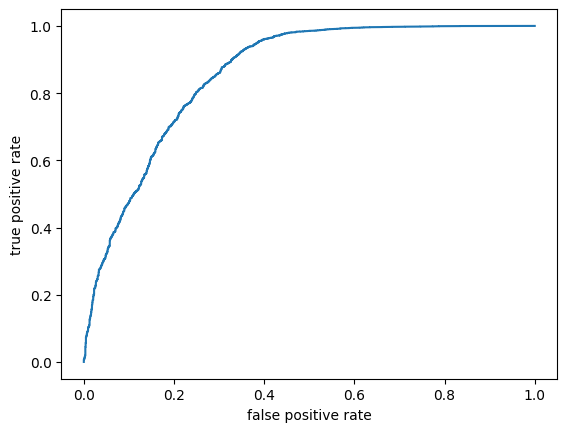

In [29]:
import matplotlib.pyplot as plt
plt.plot(fpr_train,tpr_train)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

### auc value

In [30]:
auc_value=auc(fpr_train,tpr_train)
auc_value

0.857713712610928

#### USER INPUT

In [31]:
x.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [32]:
project_data={"columns":list(x.columns)}

In [33]:
 project_data["columns"]

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_all_other',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [34]:
x.head(1).T

,0
int.rate,0.118900
installment,829.100000
log.annual.inc,11.350407
dti,19.480000
fico,737.000000
days.with.cr.line,5639.958333
revol.bal,28854.000000
revol.util,52.100000
inq.last.6mths,0.000000
delinq.2yrs,0.000000


In [36]:
int_rate=0.118900
installment=829.100000
log_annual_inc=11.350407
dti=19.480000
fico=737.000000
days_with_cr_line=5639.958333
revol_bal=28854.000000
revol_util=52.100000
inq_last_6mths=0.000000
delinq_2yrs=0.000000
pub_rec=0.000
not_fully_paid=0.000000
purpose="credit_card"

In [37]:
purpose1="purpose_"+purpose

In [38]:
array=np.zeros(len(project_data["columns"]))

In [39]:
index_value=project_data["columns"].index(purpose1)

In [40]:
array[0]=int_rate
array[1]=installment
array[2]=log_annual_inc
array[3]=dti
array[4]=fico
array[5]=days_with_cr_line
array[6]=revol_bal
array[7]=revol_util
array[8]=inq_last_6mths
array[9]=delinq_2yrs
array[10]=pub_rec
array[11]=not_fully_paid
array[index_value]=1
array

array([1.18900000e-01, 8.29100000e+02, 1.13504070e+01, 1.94800000e+01,
       7.37000000e+02, 5.63995833e+03, 2.88540000e+04, 5.21000000e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [41]:
prediction=logistic_model.predict([array])[0]
prediction

C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1.0

In [42]:
if prediction==1:
    print("credit policy is true in this case")
    
else:
    print("credit policy false")

credit policy is true in this case


### pickle file

In [44]:
import pickle
import json
with open("logistic_loan_model.pkl","wb")as f:
    pickle.dump(logistic_model,f)

In [46]:
with open("project_data.json","w")as f:
    json.dump(project_data,f)